In [1314]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
from scipy import optimize

In [1315]:
sys.path.append('D:\my github\Siyi Applied Stats\Documents for JN\AppStat2021-main\External_Functions\\')
from ExternalFunctions import Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure

In [1316]:
file_position = 'D:\my github\Siyi Applied Stats\Documents for JN\AppStat2021-main\Project\StopwatchTimer\\'
file_name = 'Yutong1x.csv'  # 导入x数据
data_name = file_position+file_name

x_data0 = open(data_name,'r')
x_data1 = []
for line in x_data0:
    x_data1.append(float(line))
x_data0.close()
x = x_data1[0:25]                       # 截取前25个周期x值

file_position = 'D:\my github\Siyi Applied Stats\Documents for JN\AppStat2021-main\Project\StopwatchTimer\\'
file_name = 'Yutong1y.csv'    # 导入y数据
data_name = file_position+file_name

y_data0 = open(data_name,'r')
y_data1 = []
for line in y_data0:
    y_data1.append(float(line))
y_data0.close()
y = y_data1[0:25]                       # 截取前25个周期y值

In [1317]:
# 这一段是用最小二乘法画出拟合直线
def fit_function(x,a,b):
    return a*x + b
a1,b1 = optimize.curve_fit(fit_function,x,y)[0]  # 最小二乘法拟合
x1 = np.arange(1,26)
print(x1)
print(x)
y1 = a1*x1 +b1  # x1,y1是拟合值，x,y是观察值
print(y1)
print(y)
print(a1,b1)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0]
[20.99078308 23.82734515 26.66390723 29.50046931 32.33703138 35.17359346
 38.01015554 40.84671762 43.68327969 46.51984177 49.35640385 52.19296592
 55.029528   57.86609008 60.70265215 63.53921423 66.37577631 69.21233838
 72.04890046 74.88546254 77.72202462 80.55858669 83.39514877 86.23171085
 89.06827292]
[20.8339, 23.9847, 26.8069, 29.4362, 32.3783, 35.091, 37.9982, 40.8548, 43.6548, 46.5115, 49.3832, 52.1467, 55.0561, 57.8944, 60.7033, 63.5348, 66.4043, 69.1371, 72.0297, 74.8704, 77.7253, 80.4797, 83.3946, 86.327, 89.1013]
2.836562076927083 18.154221000037424


In [1318]:
# 利用公式计算卡方
Npoints = 25  # 25个样本
sum1 = np.zeros_like(x)
chi2 = np.zeros_like(x)
sum2 = float
sigmay = float
ey = float

for i in range(0,25):
    sum1[i] = (y1[i]-y[i])**2  # sum1是各项(观察值-拟合值)平方的数组

sum2 = np.sum(sum1)  # sum2是sum1各项的和
sigmay = np.sqrt(sum2/(Npoints - 1))  # sigmay是y的样本标准差
variancey = sigmay**2  # variancey是y的方差
print(variancey)
ey = sigmay
print(ey)
for j in range(0,25):
    chi2[j] += sum1[j]/variancey  # 求各项chi2

Chi2_fit = np.sum(chi2)  # 求和求chi2
print(Chi2_fit)

0.004642705866346129
0.06813740431177379
24.000000000000004


In [1319]:
# 求出可能性
Nvar = 2
Ndof_fit = Npoints - Nvar
Prob_fit = stats.chi2.sf(chi2_value,Ndof_fit)
print(chi2_prob)

0.40380844445980857


C:\Users\dell\AppData\Local\Temp/ipykernel_14120/1528513462.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x,y,'ro',markersize=6,color="black")
C:\Users\dell\AppData\Local\Temp/ipykernel_14120/1528513462.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.errorbar(x, y-y1, ey, fmt='ro', color='crimson', elinewidth=2, capsize=3, capthick=1)  # errorbar


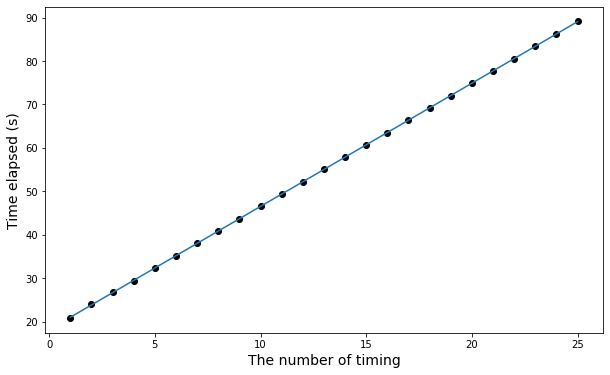

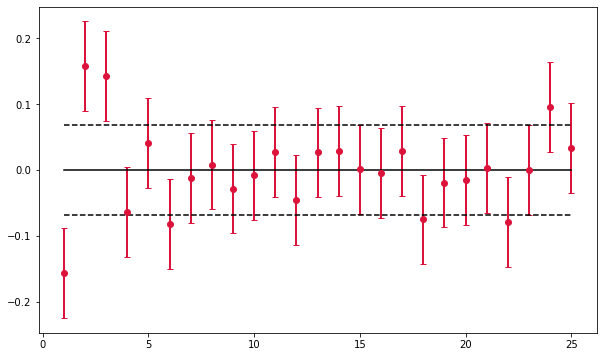

In [1320]:
# 画图
f0_x = [x for x in range(1,26)]
f0_y = np.ones_like(f0_x)*0
f1_x = [x for x in range(1,26)]
f1_y = np.ones_like(f1_x)*ey
f2_x = [x for x in range(1,26)]
f2_y = np.ones_like(f2_x)*-ey

plt.figure(figsize=(10,6),facecolor='w')
plt.plot(x,y,'ro',markersize=6,color="black")
plt.xlabel('The number of timing',fontsize=14)
plt.ylabel('Time elapsed (s)',fontsize=14)
plt.plot(x1,y1)
plt.savefig('fig1',dpi=600)

fig, ax = plt.subplots(figsize=(10,6))
ax.errorbar(x, y-y1, ey, fmt='ro', color='crimson', elinewidth=2, capsize=3, capthick=1)  # errorbar
ax.plot(f0_x,f0_y,color='black')
ax.plot(f1_x,f1_y,color='black', linestyle='dashed')
ax.plot(f2_x,f2_y,color='black', linestyle='dashed')
plt.savefig('fig2',dpi=600)
plt.show()

In [1321]:
# ry是残差
ry = []
ry = y-y1
print(ry)

[-0.15688308  0.15735485  0.14299277 -0.06426931  0.04126862 -0.08259346
 -0.01195554  0.00808238 -0.02847969 -0.00834177  0.02679615 -0.04626592
  0.026572    0.02830992  0.00064785 -0.00441423  0.02852369 -0.07523838
 -0.01920046 -0.01506254  0.00327538 -0.07888669 -0.00054877  0.09528915
  0.03302708]


In [1324]:
# 计算方均根RMS
RMS_1 = []
RMS_1 = ry**2
RMS = np.sqrt(np.sum(RMS_1))/ Npoints
print(RMS)

0.013352149836924817


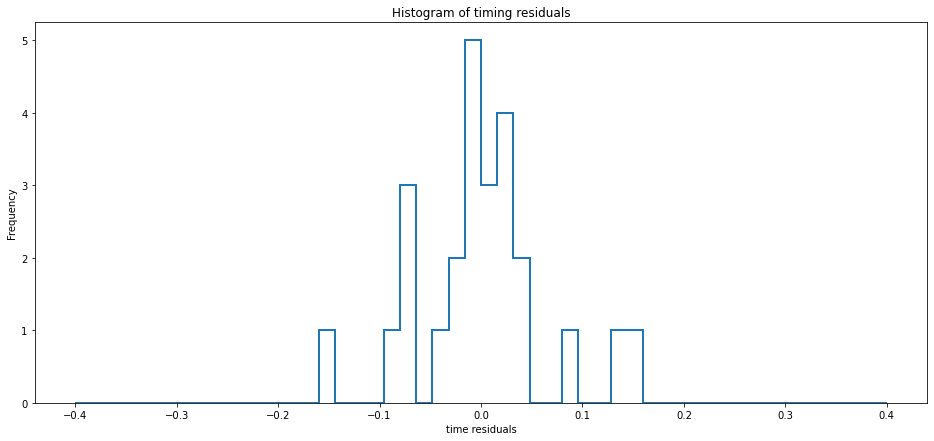

In [1322]:
xmin, xmax = -0.4, 0.4
N_bins = 50
binwidth = (xmax-xmin)/N_bins
fig4, ax4 = plt.subplots(figsize=(16, 7)) 
hist4 = ax4.hist(ry, bins=N_bins, range=(xmin, xmax), histtype='step', linewidth=2)
ax4.set(xlabel='time residuals', ylabel='Frequency', title='Histogram of timing residuals');

  Mean = 0.000,    Std = 0.068


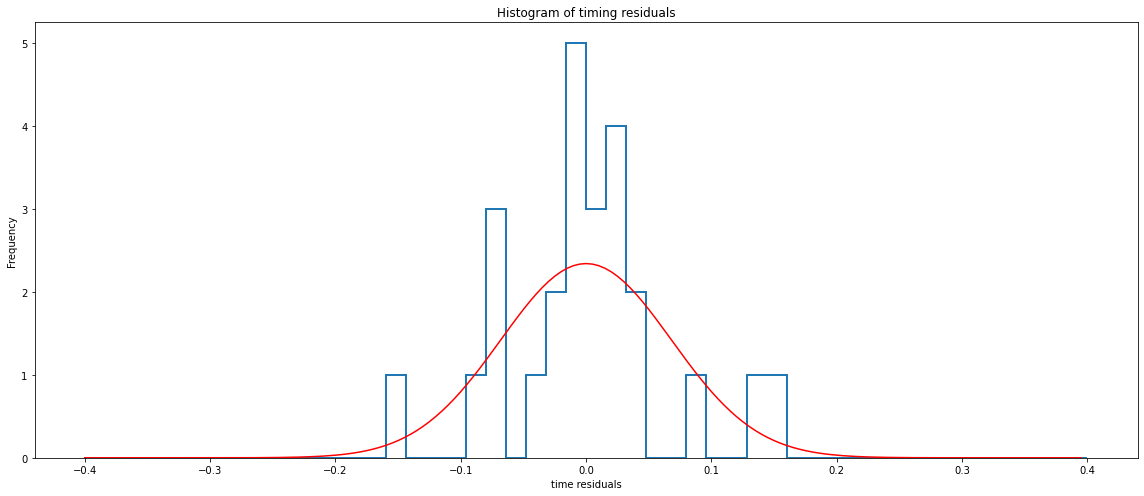

In [1323]:
def gaussian(x, N, mu, sigma, binwidth):
    return N * binwidth / (sigma*np.sqrt(2*np.pi)) * np.exp(-0.5* (x-mu)**2/sigma**2)

mu = 0
sigma = ey
print(f"  Mean = {mu:5.3f},    Std = {sigma:5.3f}")
x_gauss = np.arange(xmin,xmax,0.005)
y_gauss = gaussian(x=x_gauss,N=Npoints,mu=mu,sigma=sigma,binwidth=binwidth)


ax4.plot(x_gauss, y_gauss, '-', color='red') 
fig4.tight_layout()
fig4